***Decisiontree classifier***

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
data = pd.read_csv("loan_repayment_data.csv")
data

,Initial_payment,Last_payment,Credit_score,House_number,Loan_repaid
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes
...,...,...,...,...,...
995,413,14914,523,4683,No
996,359,14423,927,4838,No
997,316,14872,613,4760,No
998,305,14926,897,4572,No


In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 7, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7, 10],
    'max_features': [None, 'sqrt', 'log2' ],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2,1,5,10,20]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5,scoring='accuracy')
grid_search.fit(x_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'ccp_alpha': [0.0, 0.01, ...], 'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [7]:
y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier : {accuracy * 100:.2f}%")

Accuracy of Decision Tree Classifier : 95.50%


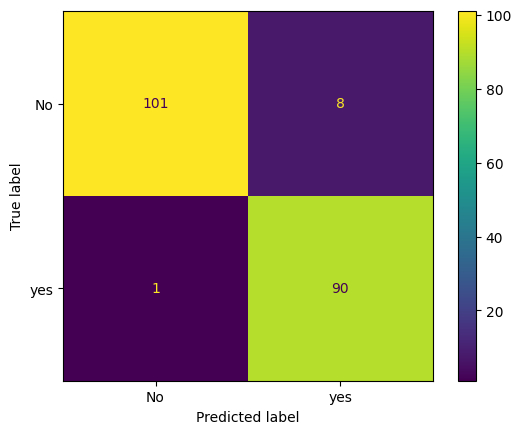

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, x_test, y_test)

Tree Visualiztion

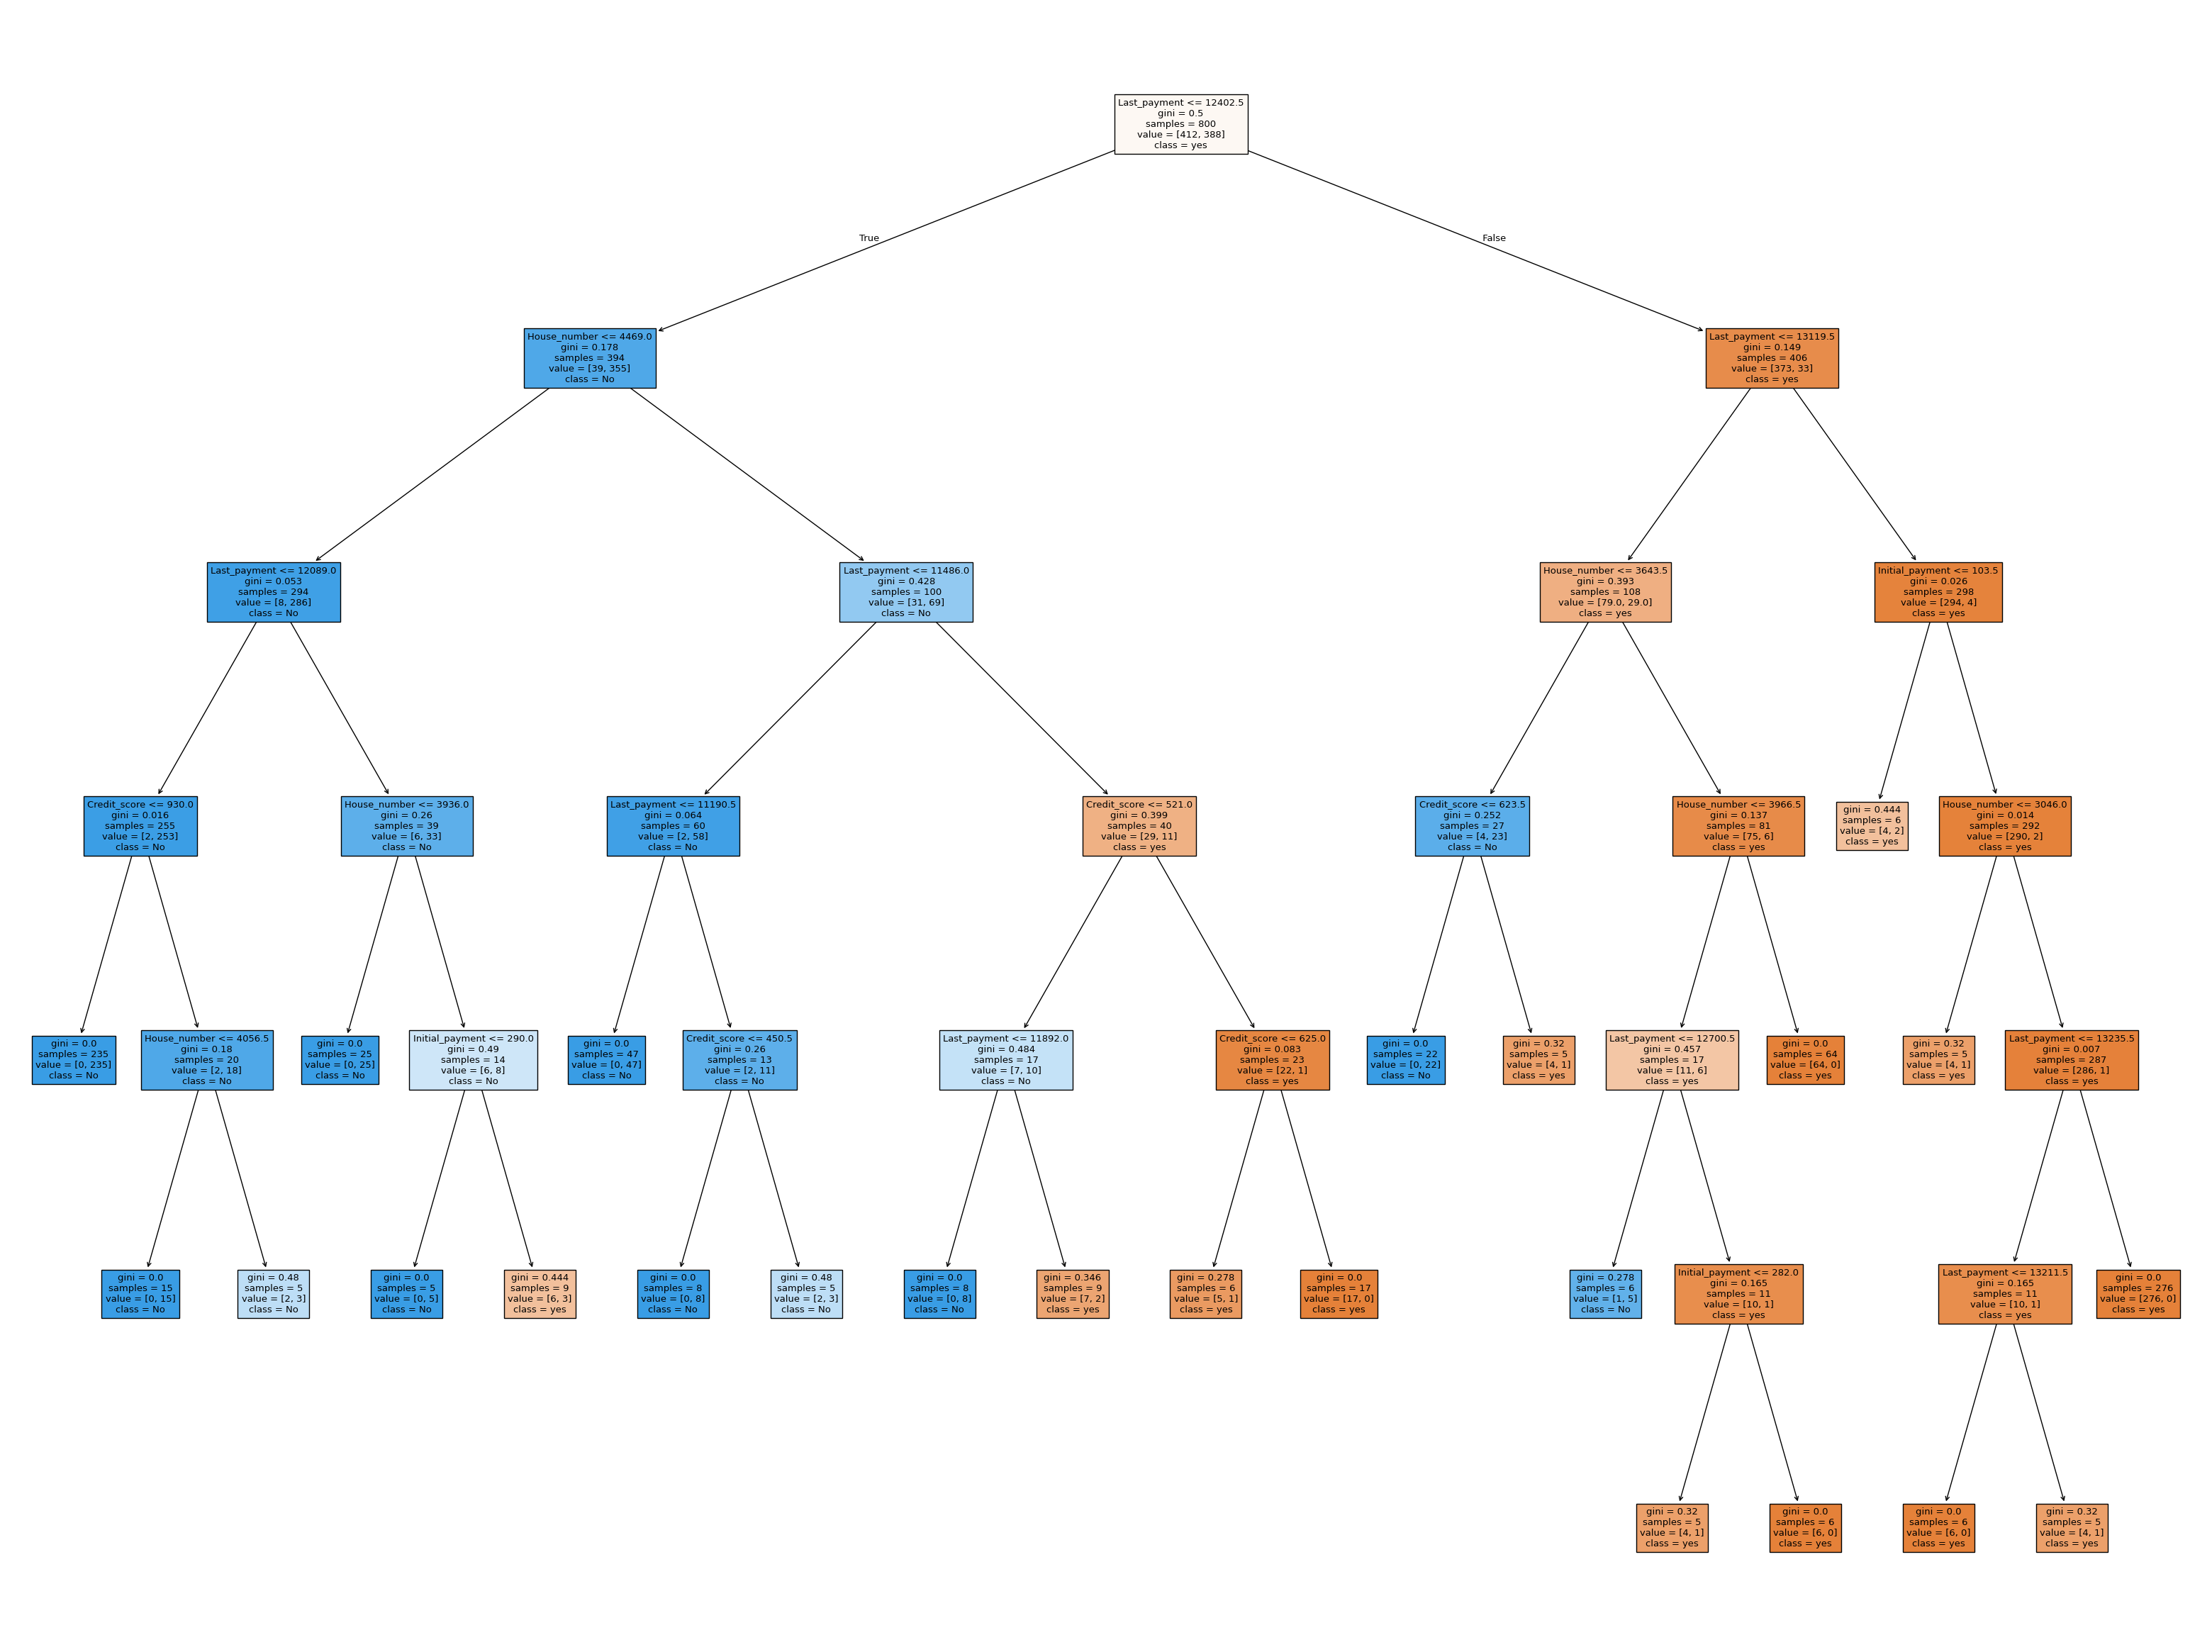

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(40,30), dpi=100)
tree.plot_tree(grid_search.best_estimator_, feature_names=['Initial_payment', 'Last_payment', 'Credit_score', 'House_number'], class_names=y.unique(), filled=True)
plt.show()
